In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stock = input("Enter the code of the stock: ")
data = yf.download(stock, "2008-01-01", "2021-01-18", auto_adjust = True)
data.head()

Enter the code of the stock: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02 00:00:00-05:00,7.572,7.876,7.564,7.850,68553
2008-01-03 00:00:00-05:00,7.873,7.980,7.610,7.674,72742
2008-01-04 00:00:00-05:00,7.652,7.859,7.500,7.841,61496
2008-01-07 00:00:00-05:00,7.803,7.940,7.701,7.879,56675
2008-01-08 00:00:00-05:00,7.909,7.997,7.880,7.967,53775


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 00:00:00-05:00 to 2021-01-15 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


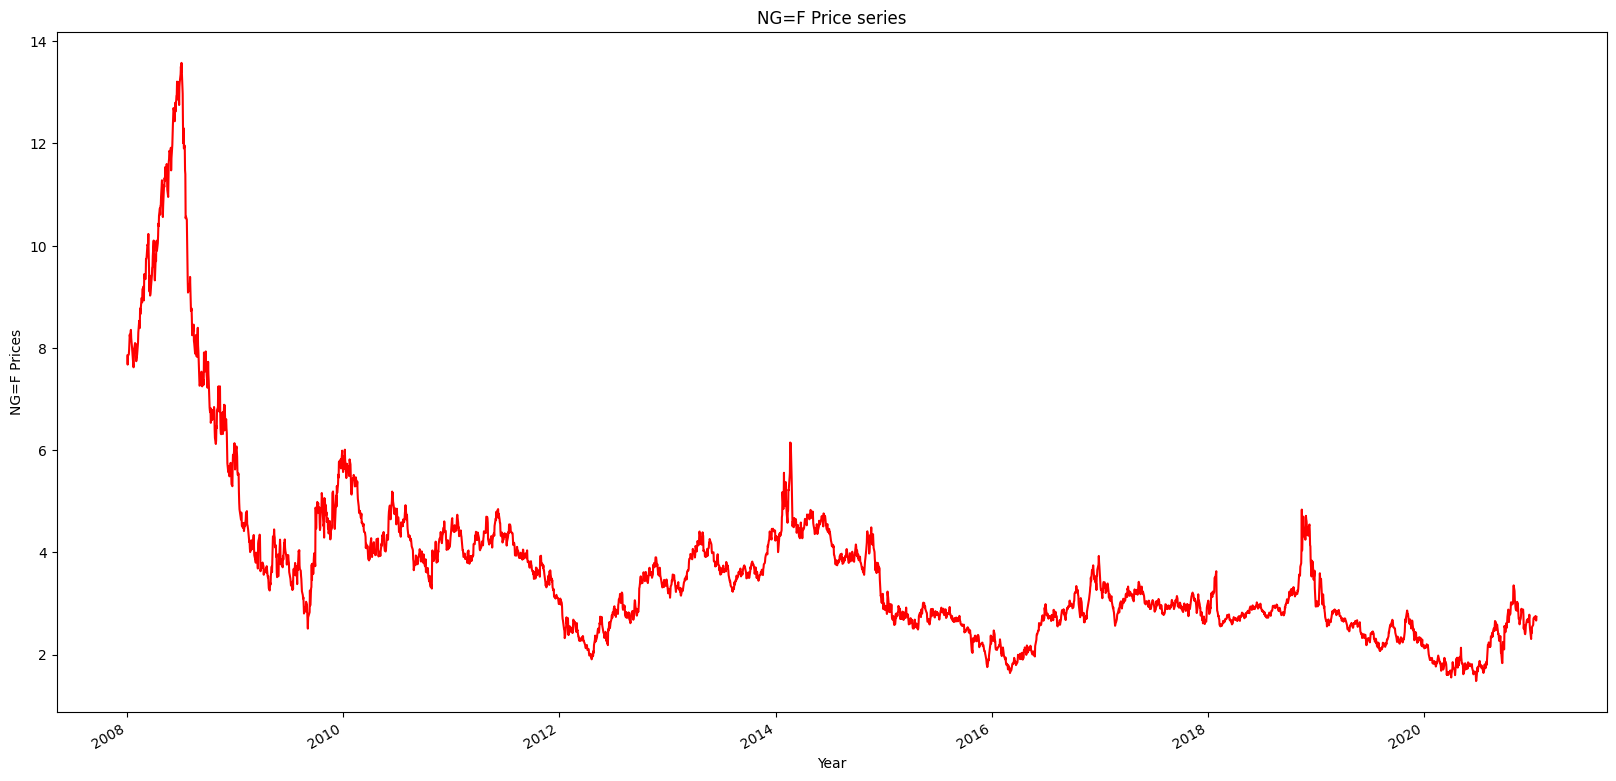

In [45]:
data.Close.plot(figsize = (20, 10), color = 'r')
plt.ylabel("{} Prices".format(stock))
plt.xlabel("Year")
plt.title("{} Price series".format(stock))
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Count'>

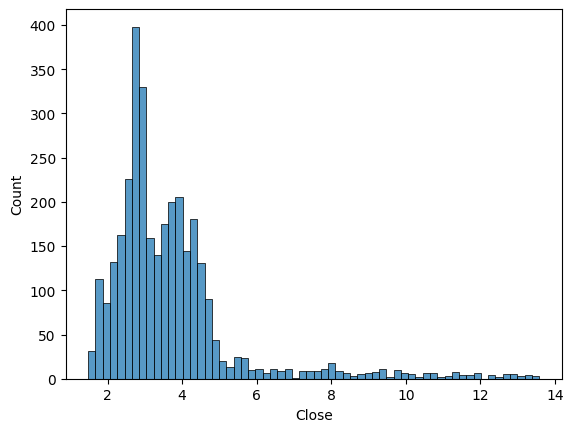

In [43]:
sns.histplot(data["Close"])

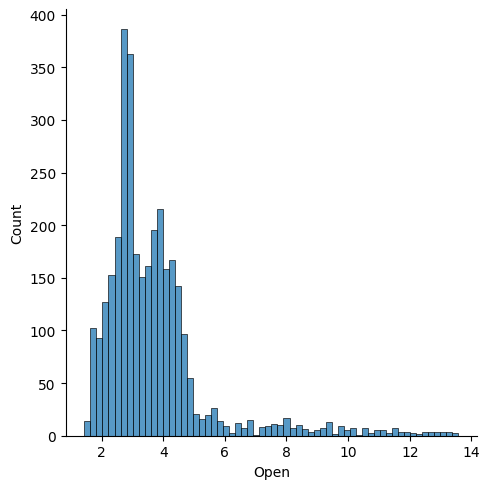

In [44]:
sns.displot(data["Open"])

In [ ]:
#Conclusions

- shape of the data
- non - linear

In [51]:
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#np.array([X_train.shape, X_test.shape, y_train.shape, y_test.shape], dtype = object)

## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [80]:
pred1

array([ 3.83019219,  3.47313796,  2.87406809,  3.80620424,  2.57759868,
        2.232131  ,  2.85302805,  5.68208257,  3.67209084,  4.13720952,
        1.75062183,  5.82750476,  4.05391444,  5.48907306,  4.29216737,
        3.08202241,  2.52294158,  4.00205412,  2.49664994,  2.95594217,
        3.65201616,  3.37884446,  4.85117162,  3.91404267,  1.99344795,
       11.54530512,  2.89753604,  4.60487719,  3.05508498,  9.38751446,
        3.00451494,  5.46902223,  3.95916214, 11.25794985,  2.62246528,
        3.1543544 ,  2.26413496,  2.86784235,  2.94946557,  2.53538423,
        2.72384783,  2.29996489,  3.80163457,  2.96489309,  3.56885202,
        1.64711675,  2.81766265,  8.68958623,  3.92674805,  9.96303892,
        4.4981776 ,  2.10995805,  3.57998536,  1.85936209,  4.79595458,
        2.63365331,  2.95184353,  4.62054248,  4.40709762,  2.80338007,
        3.25846903,  1.64186774,  2.24837235,  3.89992431,  4.85842873,
        9.98057871,  6.82101452,  2.17894188,  3.8338919 ,  2.15

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r_score)

In [63]:
calculate_metrics(y_test, pred1)

MSE:  0.001972836301429629
RMSE:  0.044416621904751256
R2_score:  0.9994434122669321


In [81]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)
la1 = la.predict(X_test)
ri1 = ri.predict(X_test)

In [82]:
calculate_metrics(y_test, la1)

MSE:  0.3447566521443249
RMSE:  0.5871598182303732
R2_score:  0.9027353038171252


In [88]:
calculate_metrics(y_test, ri1)

MSE:  0.00206813156273779
RMSE:  0.04547671451125059
R2_score:  0.99941652702895


In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.046 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.083 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.095 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.043 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.046 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.083 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.095 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.042 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.043 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.8s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.002 total time=   0.8s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.009 total time=   0.8s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.004 total time=   0.8s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.8s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.006 total time=   0.8s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.8s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.009 total time=   0.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.088 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.006 total time=   0.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [92]:
svr = SVR(C = 10, gamma = 0.01, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [95]:
import joblib 

joblib.dump(ri, 'model.pkl')

ridge_from_model = model = joblib.load('model.pkl')